Notebook to implement population model gradient descent to learn parametesr such as p_sympt, p_severe, p_hosp

In [1]:
import datetime
import turicreate as tc
import matplotlib.pyplot as plt
covidestim_csv = 'covidestim.csv'
estimates = tc.SFrame(covidestim_csv)
print(estimates['state'].unique())
state_long = 'Illinois'
state_short = 'IL' 

%load_ext autoreload
%autoreload 2
from PopulationData_ag import PopulationData
from HospitalData_v20210203 import HospitalData
# import random
import autograd

training_mid_dates = [20200901,  20201120] # start mid end, where forecasting happens from mid to end
# training_mid_dates = [20201010,  20201120] # start mid end, where forecasting happens from mid to end
forecast_duration = 80
training_end_dates = [int((datetime.datetime.strptime(str(d),'%Y%m%d') 
                       + datetime.timedelta(days = forecast_duration)).strftime('%Y%m%d')) for d in training_mid_dates]


# print(training_end_dates)
def make_forecastable_csv(date):
    pd_dummy = PopulationData(covidestim_csv, state_long,'20200711', date, forecast=False);
    pd_dummy.filtered_data.save(state_short+ '_forecast_after_' + str(date) + '.csv', format='csv') 

hd_truthful = HospitalData('CT_HHS_data.csv', state_short,'20200711','20210305')
pd_truthful = PopulationData(covidestim_csv, state_long,'20200711', '20210305', forecast=False);
# pd_truthful.filtered_data['date'].unique().sort()[-10:-1]

for d in training_mid_dates:
    make_forecastable_csv(d)

pd_list = []
for i,(m,e) in enumerate(zip(training_mid_dates,training_end_dates)):
    pd_list += [PopulationData(state_short+ '_forecast_after_'+str(m) + '.csv',state_long,'20200711',str(e), training_mode=True, debug_mode=True)]



pd_list_train = pd_list[0:-1]
pd_list_val = pd_list[-1:]

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.232435 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22748 lines in 0.218609 secs.

['Missouri', 'District of Columbia', 'Oregon', 'New Hampshire', 'Florida', 'Georgia', 'Mississippi', 'Kansas', 'South Dakota', 'Delaware', 'Hawaii', 'Rhode Island', 'Wisconsin', 'Tennessee', 'New Jersey', 'Utah', 'Colorado', 'New Mexico', 'New York', 'Puerto Rico', 'Louisiana', 'Michigan', 'Vermont', 'Arkansas', 'Nebraska', 'Oklahoma', 'West Virginia', 'Maine', 'Alaska', 'Nevada', 'North Carolina', 'California', 'Indiana', 'Ohio', 'Texas', 'Idaho', 'Washington', 'Arizona', 'Minnesota', 'Iowa', 'Illinois', 'Kentucky', 'South Carolina', 'Montana', 'Massachusetts', 'Virginia', 'Pennsylvania', 'Wyoming', 'Connecticut', 'Alabama', 'Maryland', 'North Dakota']


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/HHS_data.csv

Parsing completed. Parsed 100 lines in 0.18204 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,float,int,int,int,float,int,int,int,float,int,int,int,float,int,int,int,float,int,int,int,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/HHS_data.csv

Parsing completed. Parsed 21746 lines in 0.174904 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/CT_data.csv

Parsing completed. Parsed 100 lines in 0.3709 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,int,int,int,int,str,int,int,int,int,int,int,int,int,str,str,str,int,int,int,str,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,str,int,int,str,int,int,int,int,int,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/CT_data.csv

Parsing completed. Parsed 20780 lines in 0.337068 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.218884 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22748 lines in 0.198661 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.301253 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22748 lines in 0.256547 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.193515 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22748 lines in 0.201619 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/IL_forecast_after_20200901.csv

Parsing completed. Parsed 53 lines in 0.029126 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,int,float,str,str,float,str,str,float,float,str,str,float,str,str,str,str,float,str,str,float,str,str,float,str,str,float,str,str,int,str,str,float,str,str,float,float,str,str,str,str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/IL_forecast_after_20200901.csv

Parsing completed. Parsed 53 lines in 0.00765 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.197098 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22748 lines in 0.212348 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/IL_forecast_after_20201120.csv

Parsing completed. Parsed 100 lines in 0.051135 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,int,float,str,str,float,str,str,float,float,str,str,float,str,str,str,str,float,str,str,float,str,str,float,str,str,float,str,str,int,str,str,float,str,str,float,float,str,str,str,str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/IL_forecast_after_20201120.csv

Parsing completed. Parsed 133 lines in 0.01441 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.180559 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22748 lines in 0.203026 secs.

In [2]:
hd_truthful.filtered_data

previous_day_admission_adult_covid_confirmed ...,total_adult_patients_hospitalized_confirmed_covid ...,staffed_icu_adult_patients_confirmed_covid ...,previous_day_admission_adult_covid_confirmed_c ...,total_adult_patients_hospitalized_confirmed_co ...
None,None,None,0,0
None,None,None,0,0
None,None,None,0,0
None,None,None,0,0
65,634,185,74,96
59,618,170,87,109
102,681,197,89,114
95,671,191,91,116
79,692,198,92,115
93,661,195,94,115


170.51310711831914 predicted for hosp  
173.52813232866384 predicted for hosp  
177.768742278008 predicted for hosp  
182.25545338462993 predicted for hosp  
186.60419119043019 predicted for hosp  
190.63261792050932 predicted for hosp  
194.26129707554145 predicted for hosp  
197.4690997922766 predicted for hosp  
200.26921368084388 predicted for hosp  
202.69511066475928 predicted for hosp  
204.7919321190961 predicted for hosp  
206.6110113624907 predicted for hosp  
208.20628083203638 predicted for hosp  
209.63184435234842 predicted for hosp  
210.9402993091166 predicted for hosp  
212.1815705923873 predicted for hosp  
213.40211434714735 predicted for hosp  
214.64439796364928 predicted for hosp  
215.94658973104228 predicted for hosp  
217.3424157561932 predicted for hosp  
218.8611614691282 predicted for hosp  
220.52780293161476 predicted for hosp  
222.36325134414207 predicted for hosp  
224.38468835462322 predicted for hosp  
226.60596224970698 predicted for hosp  
229.03800

/Users/cuongnguyen/Desktop/cn_autograd_debugging/env/lib/python3.8/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/Users/cuongnguyen/Desktop/cn_autograd_debugging/env/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:763: RuntimeWarning: invalid value encountered in subtract
  Pk = special.xlogy(k, mu) - gamln(k + 1) - mu
/Users/cuongnguyen/Desktop/cn_autograd_debugging/env/lib/python3.8/site-packages/autograd/numpy/numpy_vjps.py:75: RuntimeWarning: invalid value encountered in double_scalars
  defvjp(anp.exp,    lambda ans, x : lambda g: ans * g)


nan loss at iteration  0 *** gradients_cummsum =  nan


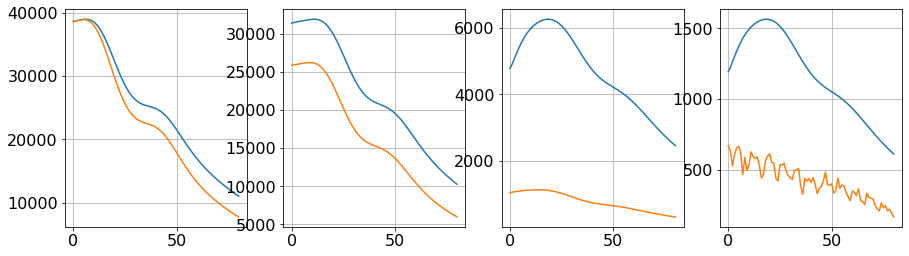

new_params =  {'T_serial': 5.8, 'prob_sympt_s': 1.5163474893680882, 'prob_severe_s': -1.3862943611198906, 'prob_hosp_s': -1.0986122886681098, 'prob_soujourn_inf_alpha_s': 3.3764006091768333, 'prob_soujourn_inf_beta_s': -0.18482202970941045, 'prob_soujourn_symp_alpha_s': 1.3994796312774522, 'prob_soujourn_symp_beta_s': -1.4122808331473442} 

nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan pre

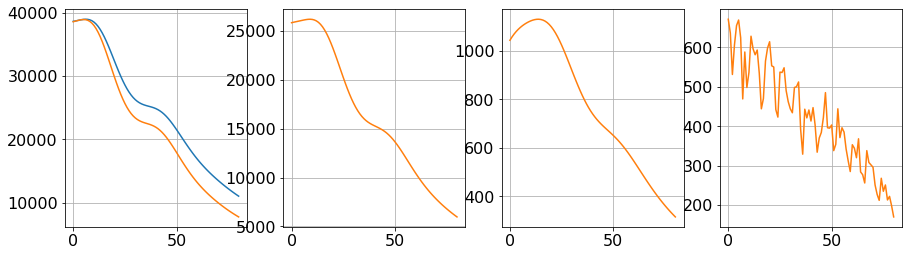

new_params =  {'T_serial': 5.8, 'prob_sympt_s': nan, 'prob_severe_s': nan, 'prob_hosp_s': nan, 'prob_soujourn_inf_alpha_s': nan, 'prob_soujourn_inf_beta_s': nan, 'prob_soujourn_symp_alpha_s': nan, 'prob_soujourn_symp_beta_s': nan} 

nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for

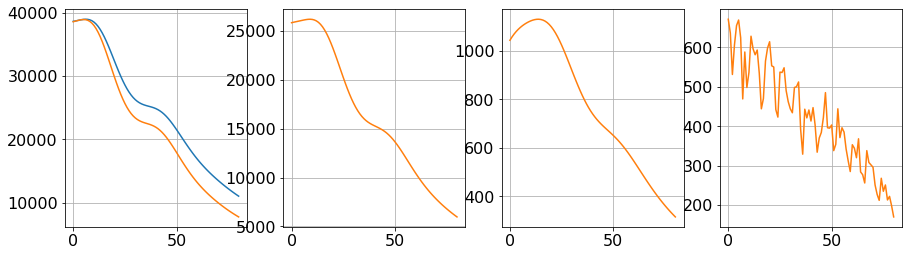

new_params =  {'T_serial': 5.8, 'prob_sympt_s': nan, 'prob_severe_s': nan, 'prob_hosp_s': nan, 'prob_soujourn_inf_alpha_s': nan, 'prob_soujourn_inf_beta_s': nan, 'prob_soujourn_symp_alpha_s': nan, 'prob_soujourn_symp_beta_s': nan} 

nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for

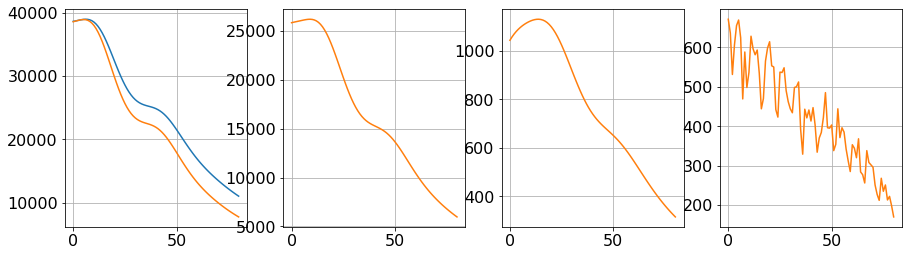

new_params =  {'T_serial': 5.8, 'prob_sympt_s': nan, 'prob_severe_s': nan, 'prob_hosp_s': nan, 'prob_soujourn_inf_alpha_s': nan, 'prob_soujourn_inf_beta_s': nan, 'prob_soujourn_symp_alpha_s': nan, 'prob_soujourn_symp_beta_s': nan} 

nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for

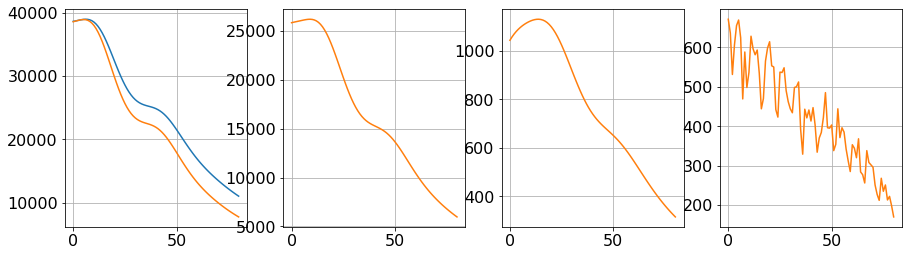

new_params =  {'T_serial': 5.8, 'prob_sympt_s': nan, 'prob_severe_s': nan, 'prob_hosp_s': nan, 'prob_soujourn_inf_alpha_s': nan, 'prob_soujourn_inf_beta_s': nan, 'prob_soujourn_symp_alpha_s': nan, 'prob_soujourn_symp_beta_s': nan} 

nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for hosp  
nan predicted for

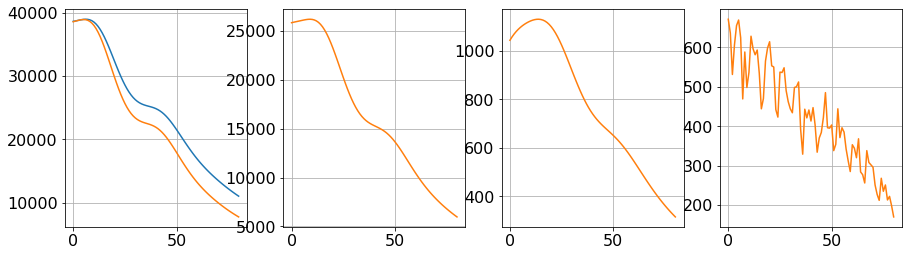

new_params =  {'T_serial': 5.8, 'prob_sympt_s': nan, 'prob_severe_s': nan, 'prob_hosp_s': nan, 'prob_soujourn_inf_alpha_s': nan, 'prob_soujourn_inf_beta_s': nan, 'prob_soujourn_symp_alpha_s': nan, 'prob_soujourn_symp_beta_s': nan} 



In [9]:
def get_truthdict_given_mid_end(mid_date,end_date):
#     print(mid_date,end_date, 'mid date end date')
    pd_truthful.start_date = mid_date
    pd_truthful.end_date = end_date
    hd_truthful.start_date = mid_date
    hd_truthful.end_date = end_date
    truthdict = {
    'date':pd_truthful.filtered_data['date'],
    'infections':pd_truthful.filtered_data['infections'],
    'symptomatic':pd_truthful.filtered_data['symptomatic'],
    'severe':pd_truthful.filtered_data['severe'],
    'hosp':hd_truthful.filtered_data['previous_day_admission_adult_covid_confirmed'],
    }

    return truthdict


def add_to_dict(d,g):
    for k in d.keys():
        d[k]=d[k]+g[k]
    return d

def scale_dict_vals(d,s):
    for k in d.keys():
        d[k] = s*d[k]
    return d

def cumsum_dict_vals(d,s):
    cumsum= 0
    for k in d.keys():
        cumsum+=abs(s*d[k])
    return cumsum

import numpy as np
softplus = lambda x: np.log(1+np.exp(x))
softplus_inv = lambda x: np.log(np.exp(x) -1)
from scipy.special import expit as sigmoid
from scipy.special import logit as sigmoid_inv

import numpy.random as random
def gradient_descent(pd_list_train, init_params, n_iters=2, step_size=0.001, n_steps_between_print=5, lambda_reg = 1, epsilon_stop=5e-10):
    batch_loss_per_iteration = []
    val_loss_per_iteration = []
    for n in range(n_iters):
        
        batch_loss = 0
        for pd in pd_list_train:
            pd.loss_per_iteration += [0]
        
        #         pd_batch = random.choice(pd_list_train,replace=False, size=3)
        pd_batch = random.choice(pd_list_train,replace=False, size=1)
        if n == 0:
            new_params = init_params
        else:
            new_params = add_to_dict(new_params, scale_dict_vals(grads, -1*step_size))
        
        
        for i,pd in enumerate(pd_batch):
            pd.training_mode=True
            new_grad = pd.get_grad_of_loss(new_params,get_truthdict_given_mid_end(pd.filtered_data['date'][-1], pd.end_date) ,lambda_reg= lambda_reg)
            batch_loss += pd.loss_per_iteration[-1] # pd.loss_per_iteration[-1] is set to loss within get_grad_of_loss call
            if i == 0:
                grads = new_grad
            else:
                grads = add_to_dict(grads, new_grad)
        
        grads = scale_dict_vals(grads, 1/len(pd_batch))
        batch_loss_per_iteration += [batch_loss/len(pd_batch)]
        print(batch_loss/len(pd_batch), 'loss at iteration ', n, '*** gradients_cummsum = ', cumsum_dict_vals(grads, step_size))
#         print(cumsum_dict_vals(grads,1), 'cumsum for ', grads)
        
#         pd_list_val = pd_batch # DEBUG PURPOSES
        
        val_loss_per_iteration += [np.nan]
        if n%n_steps_between_print == 0:
            val_loss = 0              
            for pd in pd_list_val:
                fig, [ax1, ax2, ax3, ax4] = plt.subplots(nrows=1, ncols=4,figsize=(15,4))    
                pd.training_mode=False
                fc_data = pd.get_forecasted_data(new_params) 
                pd.training_mode=True
                truth_data = get_truthdict_given_mid_end(pd.filtered_data['date'][-1],pd.end_date)
                
                ax1.plot(fc_data['infections'])
                ax2.plot(fc_data['symptomatic'])
                ax3.plot(fc_data['severe'])
                ax4.plot(fc_data['hosp'])

                ax1.plot(truth_data['infections'])
                ax2.plot(truth_data['symptomatic'])
                ax3.plot(truth_data['severe'])
                ax4.plot(truth_data['hosp'])
                for i in range(1,5,1):
                    eval('ax' + str(i) + '.grid()') 
                plt.show()
                print('new_params = ',new_params,'\n')
                loss = 0
                for i,k in enumerate(['symptomatic', 'severe','hosp']):
                    val_loss+=np.sum(np.abs(np.array(fc_data[k]) - np.array(truth_data[k]))*np.linspace(0.1, 1, num=len(fc_data[k])) )*(i+1)
            val_loss_per_iteration[-1] = val_loss/len(pd_list_val)
        
        if cumsum_dict_vals(grads, step_size)<epsilon_stop:
            return new_params, batch_loss_per_iteration, val_loss_per_iteration
    return new_params, batch_loss_per_iteration, val_loss_per_iteration

# train_params = {'T_serial':5.8,'prob_sympt':0.82,'prob_severe':0.2,'prob_hosp':0.25,'prob_soujourn_inf_alpha':3.41, 'prob_soujourn_inf_beta':0.605,'prob_soujourn_symp_alpha':1.62, 'prob_soujourn_symp_beta':0.218}
##TODO REPARAM change the relevant params to be their inverse fn transformed
train_params = {'T_serial':5.8,'prob_sympt_s':sigmoid_inv(0.82),'prob_severe_s':sigmoid_inv(0.2),'prob_hosp_s':sigmoid_inv(0.25),
                'prob_soujourn_inf_alpha_s':softplus_inv(3.41), 'prob_soujourn_inf_beta_s':softplus_inv(0.605),
                'prob_soujourn_symp_alpha_s':softplus_inv(1.62), 'prob_soujourn_symp_beta_s':softplus_inv(0.218)}
new_params, batch_loss_per_iteration, val_loss_per_iteration = gradient_descent(
    pd_list_train, train_params, n_iters=11, step_size=5e-5, n_steps_between_print=2, lambda_reg=1,epsilon_stop=1e-4)



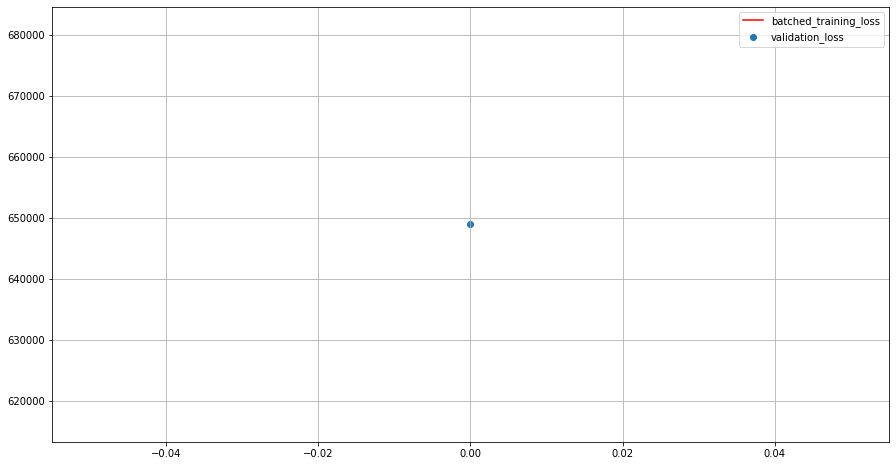

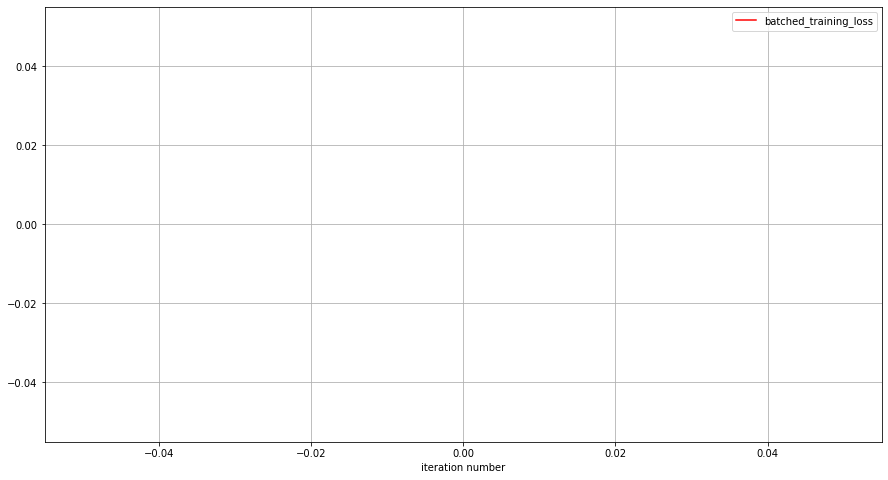

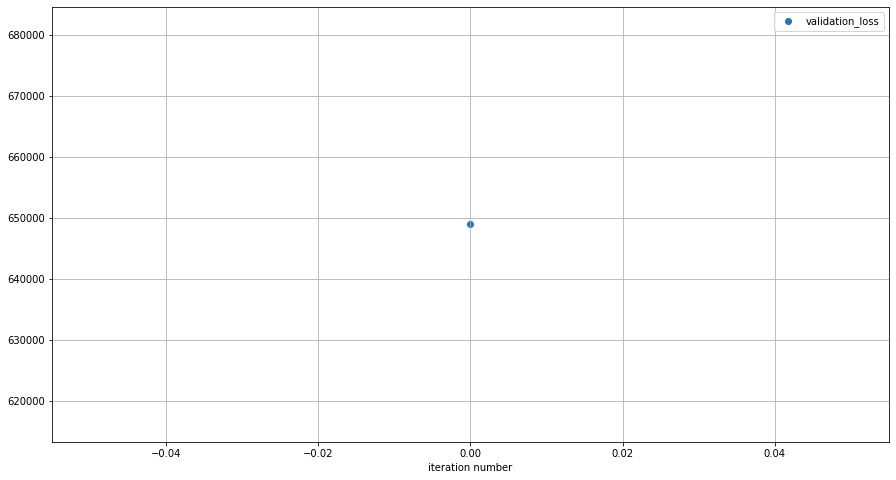

In [4]:
fig = plt.figure(figsize=(15,8))
plt.plot(batch_loss_per_iteration,color='r', label='batched_training_loss')
# plt.show()

plt.scatter(list(range(len(val_loss_per_iteration))),val_loss_per_iteration,label='validation_loss')
plt.legend()
plt.grid()
plt.show()

fig = plt.figure(figsize=(15,8))
plt.plot(batch_loss_per_iteration,color='r', label='batched_training_loss')
plt.legend()
plt.grid()
plt.xlabel('iteration number')
plt.show()

fig = plt.figure(figsize=(15,8))
plt.scatter(list(range(len(val_loss_per_iteration))),val_loss_per_iteration,label='validation_loss')
plt.legend()
plt.grid()
plt.xlabel('iteration number')
plt.show()

# print(val_loss_per_iteration)
# import numpy as np
# np.linspace(1, 10, num=10) * np.array(np.linspace(0.1, 1, num=10))


{'T_serial': 5.8, 'prob_sympt_s': 1.5163474893680882, 'prob_severe_s': -1.3862943611198906, 'prob_hosp_s': -1.0986122886681098, 'prob_soujourn_inf_alpha_s': 3.3764006091768333, 'prob_soujourn_inf_beta_s': -0.18482202970941045, 'prob_soujourn_symp_alpha_s': 1.3994796312774522, 'prob_soujourn_symp_beta_s': -1.4122808331473442}
20200801  to  20210225
cyan = forecasts after being trained on that interval
violet = forecasts on validation/unseen interval


<ipython-input-5-ea5d2a380da0>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['']+ date_labels)


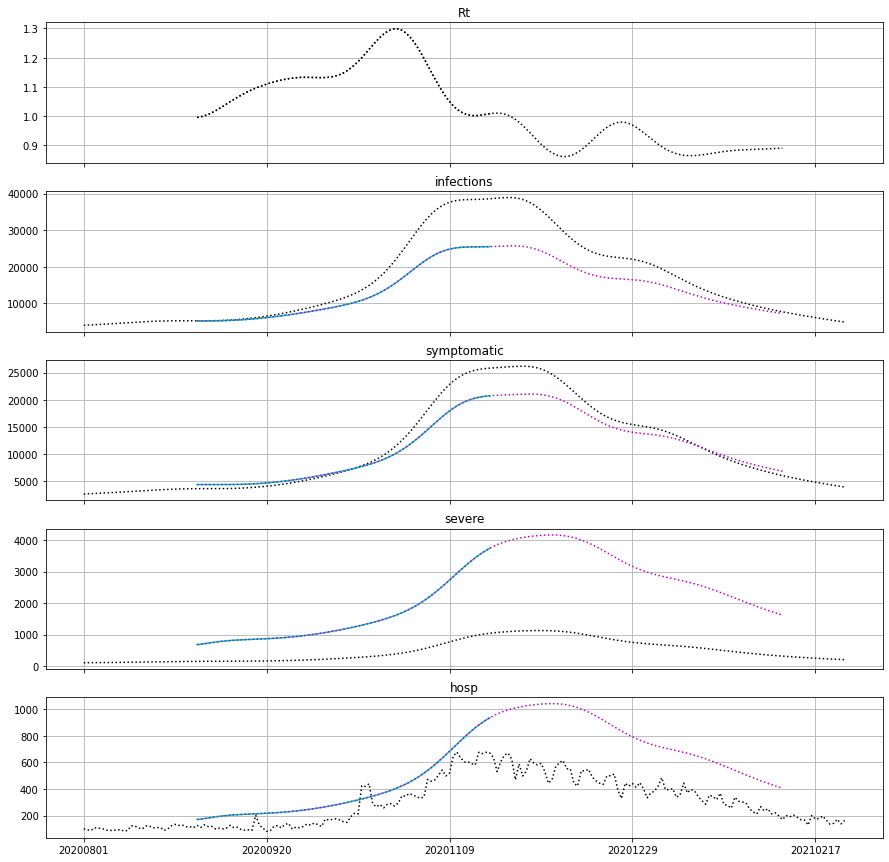

{'T_serial': 5.8, 'prob_sympt_s': nan, 'prob_severe_s': nan, 'prob_hosp_s': nan, 'prob_soujourn_inf_alpha_s': nan, 'prob_soujourn_inf_beta_s': nan, 'prob_soujourn_symp_alpha_s': nan, 'prob_soujourn_symp_beta_s': nan}
20200801  to  20210225
cyan = forecasts after being trained on that interval
violet = forecasts on validation/unseen interval


<ipython-input-5-ea5d2a380da0>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['']+ date_labels)


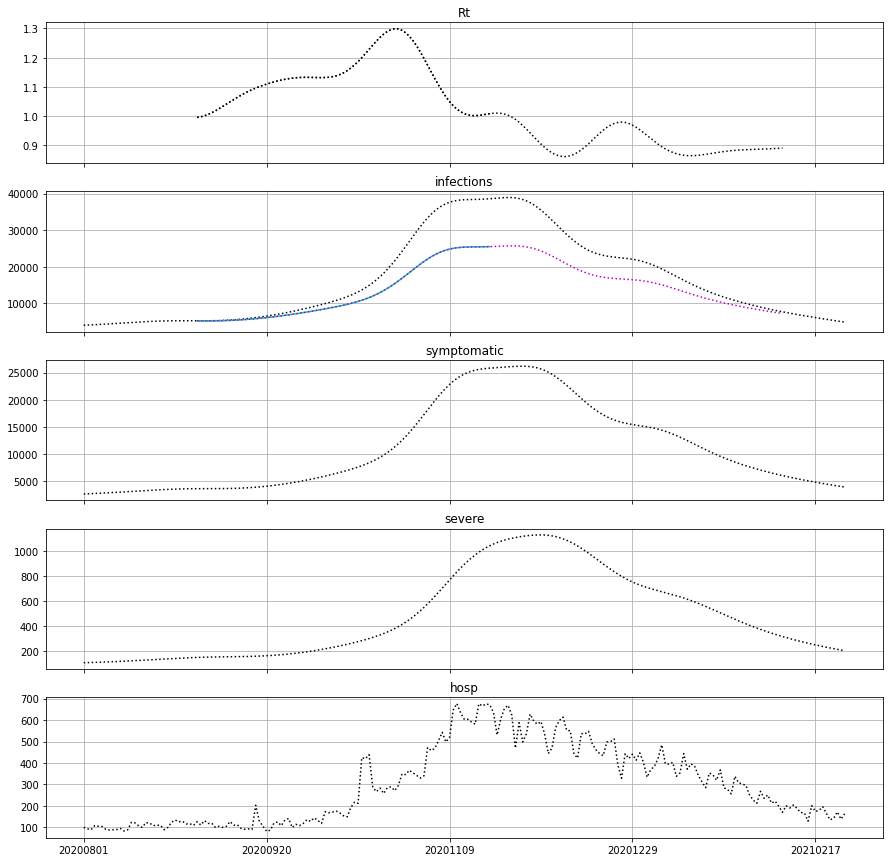

In [5]:
def plot_performance(new_params):
    color_list = ['k','k','k','k','k']
    fig, [ax1, ax2, ax3, ax4, ax5] = plt.subplots(nrows=5, ncols=1,figsize=(15,15), sharex=True)   
    truth_data = get_truthdict_given_mid_end('20200801', '20210225')
    print(pd_truthful.start_date, ' to ', pd_truthful.end_date)
    print('cyan = forecasts after being trained on that interval')
    print('violet = forecasts on validation/unseen interval')


    for i,(p,c) in enumerate(zip(['Rt','infections', 'symptomatic', 'severe','hosp'],color_list)):
        if p != 'Rt':
            eval('ax'+str(i+1) + ".plot( truth_data[p], color = c,ls=':' )")
                            
        for pd in pd_list_train:
            pd.training_mode = False
            fc_data = pd.get_forecasted_data(new_params) 
    #         '-', '--', '-.', ':',
            start_idx = list(truth_data['date']).index(int(fc_data['date'][0]))
            end_idx = list(truth_data['date']).index(int(fc_data['date'][-1]))
            if p != 'Rt':
                eval('ax'+str(i+1) + ".plot( list(range(start_idx,end_idx+1)),fc_data[p], color = 'c',ls = '-' )")
            else:
                eval('ax'+str(i+1) + ".plot( list(range(start_idx,end_idx+1)),fc_data[p], color = 'k',ls = ':' )")

        #         for pd in pd_list_val:
        for pd in pd_list_train:
            pd.training_mode = False
            end_date_original = pd.end_date
            pd.end_date = str((datetime.datetime.strptime(str(end_date_original),'%Y%m%d') + datetime.timedelta(days = forecast_duration)).strftime('%Y%m%d'))
            fc_data = pd.get_forecasted_data(new_params) 
    #         '-', '--', '-.', ':',
            start_idx = list(truth_data['date']).index(int(fc_data['date'][0]))
            end_idx = list(truth_data['date']).index(int(fc_data['date'][-1]))
            if p != 'Rt':
                eval('ax'+str(i+1) + ".plot( list(range(start_idx,end_idx+1)),fc_data[p], color = 'm',ls = ':' )")
            else:
                eval('ax'+str(i+1) + ".plot( list(range(start_idx,end_idx+1)),fc_data[p], color = 'k',ls = ':' )")
            
            pd.end_date = end_date_original
        eval('ax'+str(i+1) + '.set_title(p)')
        eval('ax'+str(i+1) + '.grid()')
    # current_labels = ax4.get_xticklabels()

    #     eval('ax'+str(i+1) + ".set_xticklabels( [str(d) for d in list(truth_data['date']) ] )" )
    current_labels = ax4.get_xticks();
    date_labels = [truth_data['date'][int(jj)] for jj in list(current_labels[1:-1]) ]

    ax4.set_xticklabels(['']+ date_labels)

# train_params = {'T_serial':5.8,'prob_sympt':0.536,'prob_severe':0.1,'prob_hosp':0.55,'prob_soujourn_inf_alpha':3.41, 'prob_soujourn_inf_beta':0.605,'prob_soujourn_symp_alpha':1.62, 'prob_soujourn_symp_beta':0.218}
# train_params = {'T_serial':5.8,'prob_sympt':0.82,'prob_severe':0.2,'prob_hosp':0.25,'prob_soujourn_inf_alpha':3.41, 'prob_soujourn_inf_beta':0.605,'prob_soujourn_symp_alpha':1.62, 'prob_soujourn_symp_beta':0.218}
train_params = {'T_serial':5.8,'prob_sympt_s':sigmoid_inv(0.82),'prob_severe_s':sigmoid_inv(0.2),'prob_hosp_s':sigmoid_inv(0.25),
                'prob_soujourn_inf_alpha_s':softplus_inv(3.41), 'prob_soujourn_inf_beta_s':softplus_inv(0.605),
                'prob_soujourn_symp_alpha_s':softplus_inv(1.62), 'prob_soujourn_symp_beta_s':softplus_inv(0.218)}

print(train_params)
plot_performance(train_params)
plt.show()

print(new_params)
plot_performance(new_params)


In [6]:
import pickle


filename = state_short + '_population_params_trained_on_'+str(training_mid_dates[0])+'_'+str(training_end_dates[0])
with open(filename+'.pickle', 'wb') as handle:
    pickle.dump(new_params, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(filename+'.pickle', 'rb') as handle:
    b = pickle.load(handle)

print (new_params == b)
print(new_params)

False
{'T_serial': 5.8, 'prob_sympt_s': nan, 'prob_severe_s': nan, 'prob_hosp_s': nan, 'prob_soujourn_inf_alpha_s': nan, 'prob_soujourn_inf_beta_s': nan, 'prob_soujourn_symp_alpha_s': nan, 'prob_soujourn_symp_beta_s': nan}


0.8181818181818182 *mean value given a,b* 9 2
0.012396694214876033 *var value given a,b* 9 2
nan optimized param prob_sympt_s


/Users/cuongnguyen/Desktop/cn_autograd_debugging/env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


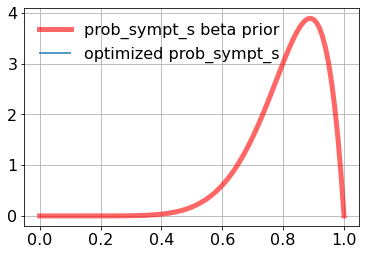

0.2 *mean value given a,b* 2 8
0.014545454545454545 *var value given a,b* 2 8
nan optimized param prob_severe_s


/Users/cuongnguyen/Desktop/cn_autograd_debugging/env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


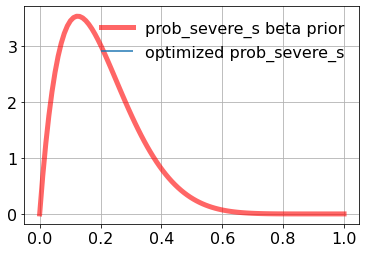

0.25 *mean value given a,b* 2 6
0.020833333333333332 *var value given a,b* 2 6
nan optimized param prob_hosp_s


/Users/cuongnguyen/Desktop/cn_autograd_debugging/env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


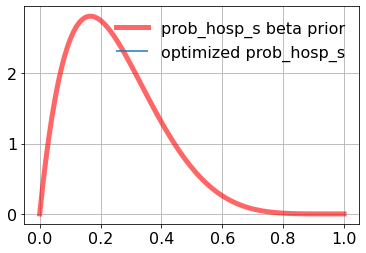

In [7]:
## TODO consider plotting the prior distrobutions and consider plotting posterior distribution

import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(1, 1)

prior_params_ab = {'prob_sympt_s':[9,2],'prob_severe_s':[2,8],'prob_hosp_s':[2,6]}

        
for k,v in prior_params_ab.items():
    a = v[0]
    b = v[1]
    mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
    print(mean,'*mean value given a,b*', a,b)
    print(var,'*var value given a,b*', a,b)
    print(sigmoid(new_params[k]), 'optimized param', k)

    x = np.linspace(0,1,100)
    pdf_vals = beta.pdf(x, a, b)
    plt.plot(x, pdf_vals,
           'r-', lw=5, alpha=0.6, label=k+' beta prior')
    plt.vlines(sigmoid(new_params[k]),np.min(pdf_vals),beta.pdf(sigmoid(new_params[k]), a, b), label='optimized '+ k)

    plt.legend(loc='best', frameon=False)
    plt.grid()
    plt.show()

4.693986464958364 1.0832804882575846 a,b
nan = optimized prob_soujourn_inf_alpha_s


/Users/cuongnguyen/Desktop/cn_autograd_debugging/env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


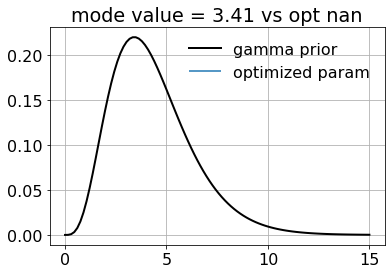

------
1.351693639556777 0.5813118009202929 a,b
nan = optimized prob_soujourn_inf_beta_s


/Users/cuongnguyen/Desktop/cn_autograd_debugging/env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


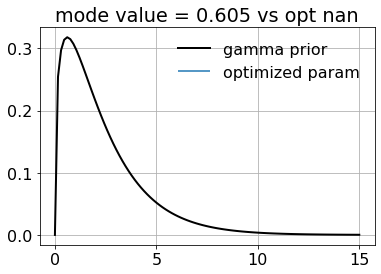

------
2.2019589211697066 0.741949951339325 a,b
nan = optimized prob_soujourn_symp_alpha_s


/Users/cuongnguyen/Desktop/cn_autograd_debugging/env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


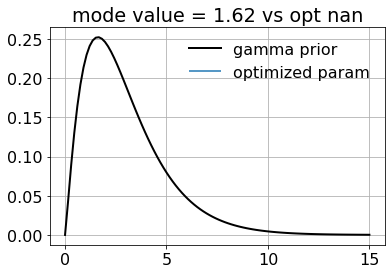

------
1.115102258598192 0.527992011918313 a,b
nan = optimized prob_soujourn_symp_beta_s


/Users/cuongnguyen/Desktop/cn_autograd_debugging/env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


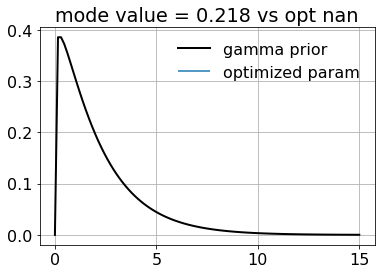

------


In [8]:
import numpy as np
from scipy.stats import gamma
# import matplotlib.pyplot as plt
import math
qfn = lambda a,b,c: [(-b + math.sqrt(b**2 - (4*a*c) )) / (2 * a),(-b - math.sqrt(b**2 - (4*a*c) )) / (2 * a)]

            # self.params['prob_soujourn_inf_alpha']= 3.41
    # self.params['prob_soujourn_inf_beta']= 0.605
    # self.params['prob_soujourn_symp_alpha']= 1.62
    # self.params['prob_soujourn_symp_beta']= 0.218
soj_new_params = [softplus(new_params['prob_soujourn_inf_alpha_s']),softplus(new_params['prob_soujourn_inf_beta_s']),
                  softplus(new_params['prob_soujourn_symp_alpha_s']),softplus(new_params['prob_soujourn_symp_beta_s'])
                 ]
soj_param_names = ['prob_soujourn_inf_alpha_s','prob_soujourn_inf_beta_s','prob_soujourn_symp_alpha_s','prob_soujourn_symp_beta_s']
for i,mode_value in enumerate([3.41,0.605,1.62,0.218]):
    betas = qfn(4,-mode_value,-1)
    beta = max(betas)

    a = 4*beta**2

    print(a,beta, 'a,b')
    print(soj_new_params[i], '= optimized', soj_param_names[i])
#     fig, ax = plt.subplots(1, 1)
    x = np.linspace(0,15, 100)
    rv = gamma(a,scale=1/beta)
    plt.plot(x, rv.pdf(x), 'k-', lw=2, label='gamma prior')
    plt.vlines(soj_new_params[i], ymin=0,ymax=rv.pdf(soj_new_params[i]),label='optimized param')

    plt.legend(loc='best', frameon=False)
    plt.title('mode value = ' + str(mode_value) + ' vs opt ' + str(soj_new_params[i]))
    plt.grid()
    plt.show()
    
    print('------')